In [98]:
# IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("sequences.csv")

X, y = df.iloc[:,1:-1], df["label"].values
feature_names = X.columns
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [91]:
# RANDOM FOREST MODEL
clf = RandomForestClassifier()
# fitting model to test data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_acc = clf.score(X_test, y_test)
print(f"Accuracy: {test_acc}")

Accuracy: 0.879746835443038


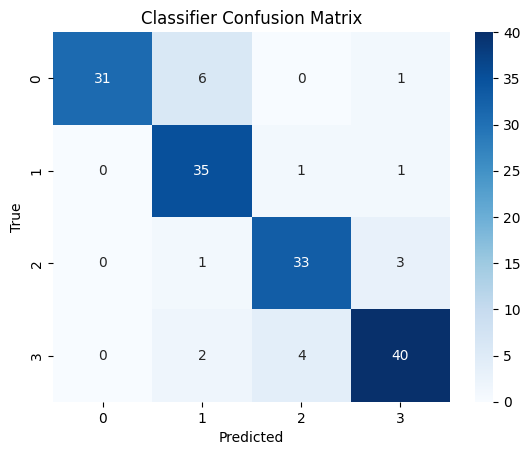

In [92]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

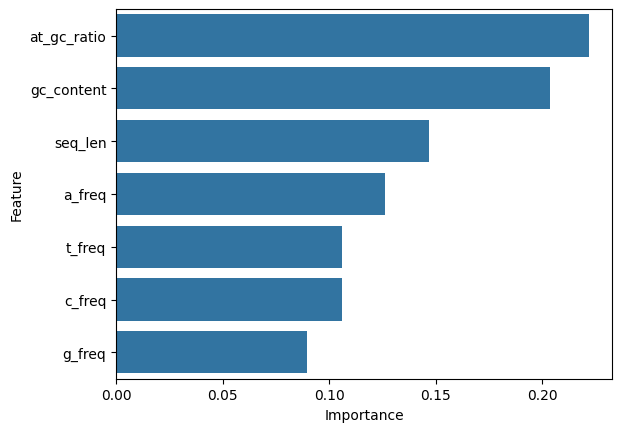

In [93]:
# feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance_df)
# plt.barh(feature_names, clf.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [120]:
# grid hyperparameter search

param_grid = {
    "n_estimators": np.arange(10, 201, 10),
    "max_features": [1.0, "sqrt", "log2"],
    "min_samples_split": np.arange(2, 11, 1),
    "criterion": ["gini", "entropy", "log_loss"]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Best CV test scores:", grid.score(X_test, y_test))

Best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 10}
Best CV score: 0.8871619047619047
Best CV test scores: 0.8354430379746836
